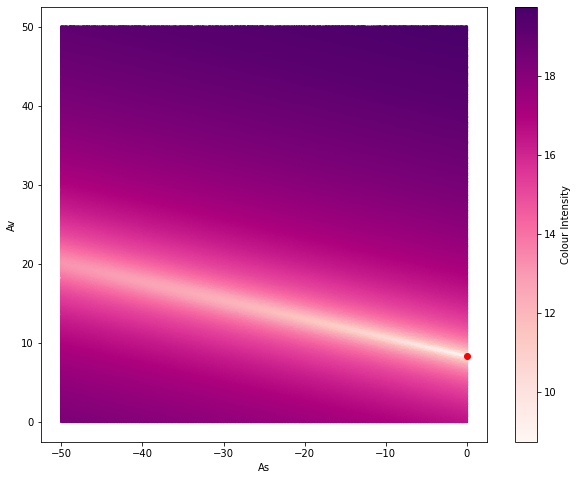

As =  0.0 Av =  8.3 minChiSq =  8.727
This is the training data being given to the neural network


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
from keras.layers import Input, Dense
from keras.models import Model

#Load data and seperate the input and output data

data = np.loadtxt('2DchiSqSurfaceTrainingData.dat')
inputData = data[:, 0:2]
outputData = data[:, 2]

maxChi = max(outputData)
minChi = min(outputData)

minPointX = inputData[np.where(outputData == minChi)[0][0], 1]
minPointY = inputData[np.where(outputData == minChi)[0][0], 0]

plt.figure(figsize=(10, 8))

plt.scatter(inputData[:, 1], inputData[:, 0], c = outputData, cmap = 'RdPu', s = 1)
cbar = plt.colorbar()
cbar.set_label("Colour Intensity")
plt.scatter(minPointX, minPointY, c = 'red')
plt.xlabel('As')
plt.ylabel('Av')
plt.show()

print("As = ", minPointX, "Av = ", minPointY, "minChiSq = ", minChi)
print("This is the training data being given to the neural network")

Epoch 1/5
40000/40000 [==============================] - 15s 361us/step - loss: 3.5442 - mse: 3.5442 - val_loss: 0.0842 - val_mse: 0.0842
Epoch 2/5
40000/40000 [==============================] - 14s 354us/step - loss: 0.0776 - mse: 0.0776 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 3/5
40000/40000 [==============================] - 14s 354us/step - loss: 0.0573 - mse: 0.0573 - val_loss: 0.0334 - val_mse: 0.0334 - loss: 0.0615 -  - ETA: 3s - loss: 0.0609  - ETA: 2s - loss: 0.0601 - mse: - ETA: 0s - loss: 0.0579 
Epoch 4/5
40000/40000 [==============================] - 14s 354us/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 5/5
40000/40000 [==============================] - 14s 352us/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0204 - val_mse: 0.0204


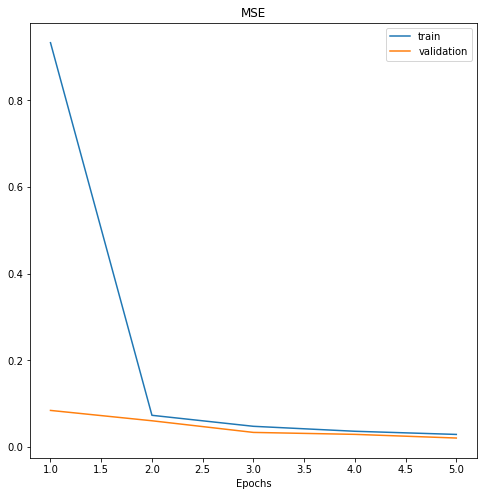

0.020829500211583408


In [4]:
#Set up neural network structure

epochs = 5
batch_size = 20
input_dim = 2

input_layer = Input(shape=(input_dim,))
layer1 = Dense(16, activation="relu", kernel_initializer="glorot_uniform")(input_layer)
layer2 = Dense(4, activation="relu", kernel_initializer="glorot_uniform")(layer1)
output_layer = Dense(1, activation="linear", kernel_initializer="glorot_uniform")(layer2)
                                                                                
                                                                        

nn = Model(inputs=input_layer, outputs=output_layer)
nn.compile(optimizer="adam", loss="mean_squared_error", metrics = ["mse"])

#train neural network

history = nn.fit(
    inputData,
    outputData,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    verbose=1,
    validation_split= 0.20,
).history

#Plot the MSE against the epochs

train_loss = history["loss"]
val_loss = history["val_loss"]
t = np.linspace(1, len(train_loss), len(train_loss))

plt.figure(figsize=(8, 8))
sns.lineplot(x = t, y = train_loss, label="train")
sns.lineplot(x = t, y = val_loss, label="validation")
plt.xlabel("Epochs")
plt.title("MSE")
plt.legend() 
plt.show()

#print the final MSE for the full set of training data

print(np.mean((outputData - nn.predict(inputData)[:,0])**2))

[[0.]] [[8.30830831]] 11.173914


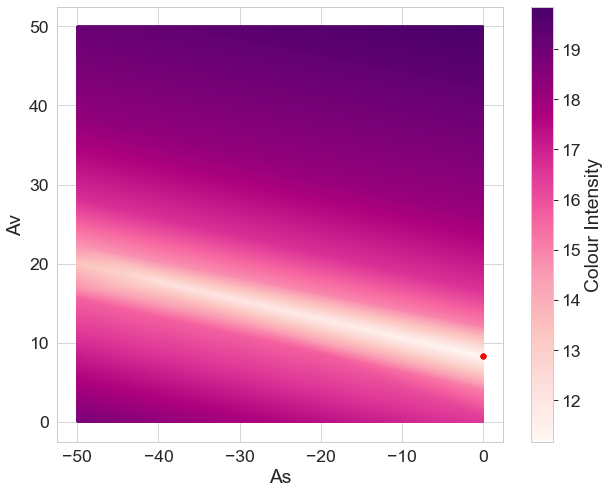

In [5]:
#Show a graph of the predictions of the fininshed nn against the data it was trained on

samples = 1000

AvQuery = np.linspace(0, 50, samples)
AsQuery = np.linspace(-50, 0, samples)

query = np.ndarray((samples*samples, 2), dtype = np.double)
index = 0
for Av in AvQuery:
    for As in AsQuery:
        query[index] = [Av, As]
        index += 1

neuralNetworkPredictions = nn.predict(query)[:, 0]

maxChi = max(neuralNetworkPredictions)
minChi = min(neuralNetworkPredictions)

minPointX = query[np.where(neuralNetworkPredictions == minChi), 1]
minPointY = query[np.where(neuralNetworkPredictions == minChi), 0]

plt.figure(figsize=(10, 8))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.05})
sns.set_context("paper", font_scale=2)   
plt.scatter(query[:, 1], query[:, 0], c = neuralNetworkPredictions, cmap = 'RdPu', s = 1)
cbar = plt.colorbar()
cbar.set_label('Colour Intensity')
plt.scatter(minPointX, minPointY, c = 'black')
print(minPointX, minPointY, minChi)

minChi2 = min(outputData)
minPointX = inputData[np.where(outputData == minChi2), 1]
minPointY = inputData[np.where(outputData == minChi2), 0]

plt.scatter(minPointX, minPointY, c = 'red')

plt.xlabel('As')
plt.ylabel('Av')
plt.show()